In [14]:
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
from ddpm import DDPM

datasaurus = pd.read_csv("datasaurus.csv")
dino = datasaurus[datasaurus["dataset"] == "dino"]
X = torch.tensor(dino[["x", "y"]].values, dtype=torch.float32)
mean = X.mean(dim=0, keepdim=True)
std = X.std(dim=0, keepdim=True)

# Normalize: (X - mean) / std
X_norm = (X - mean) / std
dataset = TensorDataset(X)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

In [15]:
X.shape

torch.Size([142, 2])

In [2]:
net = nn.Sequential(
    nn.Linear(3,64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 2)
)
ddpm = DDPM(1000, net, (2,))
ddpm.train(loader, 100)


epoch 0: mean loss = 1.5219321489334106
epoch 1: mean loss = 1.711681032180786
epoch 2: mean loss = 1.912912333011627
epoch 3: mean loss = 1.278581976890564
epoch 4: mean loss = 1.6492910742759705
epoch 5: mean loss = 1.0702791333198547
epoch 6: mean loss = 1.2687578201293945
epoch 7: mean loss = 1.2922189950942993
epoch 8: mean loss = 1.061411476135254
epoch 9: mean loss = 1.3772488355636596
epoch 10: mean loss = 0.9776320934295655
epoch 11: mean loss = 1.2040358304977417
epoch 12: mean loss = 1.0251748085021972
epoch 13: mean loss = 0.7673087120056152
epoch 14: mean loss = 1.4782116413116455
epoch 15: mean loss = 1.0190554976463317
epoch 16: mean loss = 1.1875654101371764
epoch 17: mean loss = 1.1750694990158081
epoch 18: mean loss = 0.9041582822799683
epoch 19: mean loss = 1.1327877759933471
epoch 20: mean loss = 1.074215579032898
epoch 21: mean loss = 0.9587030529975891
epoch 22: mean loss = 0.8256290256977081
epoch 23: mean loss = 0.8729568123817444
epoch 24: mean loss = 0.9963560

(100, 2)

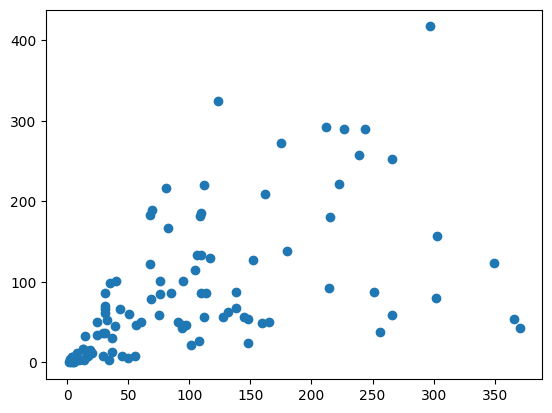

In [12]:
x = ddpm.sample(100).detach().numpy()
plt.scatter(x[:,0], x[:,1])
x.shape